In [1]:
import class_function as cf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('../Data/result_iv_selected.csv')
X = data.drop(columns=['TARGET'])
cols = []
for col in X.columns:
    cols.append(col.replace(' ', '_'))
    
X.columns = cols
Y = data.TARGET

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [4]:
data_train = pd.concat([x_train, y_train], axis = 1)
data_train_with_1 = data_train[data_train['TARGET'] == 1]
for i in range(10):
    data_train = pd.concat([data_train, data_train_with_1], axis = 0)
    
x_train = data_train.drop(columns = ['TARGET'])
y_train = data_train.TARGET

In [5]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [6]:
y_train.value_counts()

0    226038
1    219670
Name: TARGET, dtype: int64

In [7]:
226038/19970


11.318878317476214

In [8]:
xg_cla = xgb.XGBClassifier(max_depth=10, n_estimators=500, random_state=0, colsample_bylevel = 0.2, n_jobs = 8)

#模型训练
xg_cla.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.2,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=8, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [9]:
y_proba = xg_cla.predict_proba(x_test)
y_proba

array([[0.55176854, 0.44823146],
       [0.97719705, 0.02280295],
       [0.5354973 , 0.46450266],
       ...,
       [0.96867675, 0.03132323],
       [0.7367606 , 0.2632394 ],
       [0.4372183 , 0.5627817 ]], dtype=float32)

In [10]:
xg_cla.predict(x_test)[0]

0

In [11]:
import importlib
importlib.reload(cf)

threshold_list = np.arange(0, 1, 0.01)
accuracy_list = []
recall_list = []
precision_list = []
MissingAlarm_list = []
FalseAlarm_list = []
F1_list = []
fpr_list = []

for threshold in threshold_list:
    y_predicted = []
    for proba_list in y_proba:
        if proba_list[0] > threshold:
            y_predicted.append(0)
        else:
            y_predicted.append(1)
            
    fbc = cf.For_binary_classifier(y_predicted, y_test)
    accuracy_list.append(fbc.accuracy)
    recall_list.append(fbc.recall)
    precision_list.append(fbc.precision)
    MissingAlarm_list.append(fbc.MissingAlarm)
    FalseAlarm_list.append(fbc.FalseAlarm)
    F1_list.append(fbc.F1)
    fpr_list.append(fbc.fpr)
    print('*' * 40)
    

****************************************
****************************************
****************************************
****************************************
****************************************
****************************************
****************************************
****************************************
****************************************
****************************************
****************************************
****************************************
****************************************
****************************************
****************************************
****************************************
****************************************
****************************************
****************************************
****************************************
****************************************
****************************************
****************************************
****************************************
****************

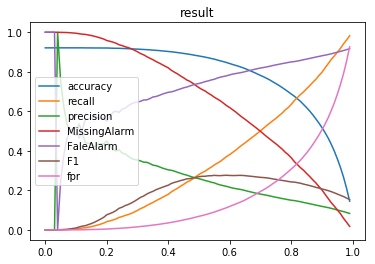

In [12]:
x_list = np.arange(0, 1, 0.01)
plt.title('result')
plt.plot(x_list, accuracy_list, label='accuracy')
plt.plot(x_list, recall_list, label='recall')
plt.plot(x_list, precision_list, label='precision')
plt.plot(x_list, MissingAlarm_list, label='MissingAlarm')
plt.plot(x_list, FalseAlarm_list, label='FaleAlarm')
plt.plot(x_list, F1_list, label='F1')
plt.plot(x_list, fpr_list, label='fpr')
plt.legend()
plt.show()

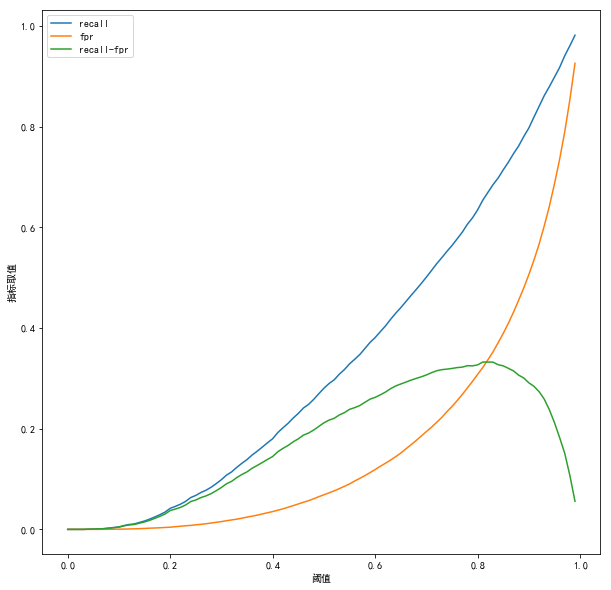

In [13]:
import matplotlib.pyplot as plt  
plt.figure(figsize=(10, 10))
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.plot(x_list, recall_list, label='recall')
plt.plot(x_list, fpr_list, label='fpr')
plt.plot(x_list, [recall_list[i] - fpr_list[i] for i in range(len(recall_list))], label='recall-fpr')
plt.legend()
plt.xlabel('阈值')
plt.ylabel('指标取值')
plt.show()

In [14]:
xg_cla.classes_

array([0, 1])

In [15]:
K_S = max([recall_list[i] - fpr_list[i] for i in range(len(recall_list))])
K_S
np.argmax([recall_list[i] - fpr_list[i] for i in range(len(recall_list))])

82

In [16]:
K_S

0.3325549755215906

In [17]:
accuracy_list[95]

0.35936458384143866

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [19.2, 10.8]
plt.rcParams['figure.dpi'] = 600
xgb.plot_tree(xg_cla,num_trees=0)
# plt.savefig('./tmp.png')
#plt.autoscale(enable=True, axis='both', tight=None)
plt.show()